In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount ('/content/drive')
# считываем файл
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/МГТУ/ВКР/Dataset_composites.csv') 

Mounted at /content/drive


In [ ]:
df

Соотношение матрица-наполнитель  Плотность, кг/м3  \
count                      1022.000000       1022.000000   
mean                          2.929777       1975.730715   
std                           0.913475         73.765207   
min                           0.389403       1731.764635   
25%                           2.317247       1924.134147   
50%                           2.906630       1977.603973   
75%                           3.552781       2021.384103   
max                           5.591742       2207.773481   

       модуль упругости, ГПа  Количество отвердителя, м.%  \
count            1022.000000                  1022.000000   
mean              739.489694                   110.569507   
std               330.101862                    28.309736   
min                 2.436909                    17.740275   
25%               499.321940                    92.431413   
50%               739.310747                   110.549159   
75%               960.465724                   129.732521   
max              1911.536477                   198.953207   

       Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
count                      1022.000000               1022.000000   
mean                         22.244367                285.883391   
std                           2.407479                 40.963286   
min                          14.254985                100.000000   
25%                          20.607747                259.029216   
50%                          22.230545                285.922290   
75%                          23.962050                313.012786   
max                          33.000000                413.273418   

       Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
count                    1022.000000                           1022.000000   
mean                      482.215915                             73.324000   
std                       280.967801                              3.117080   
min                         0.603740                             64.054061   
25%                       266.654559                             71.241213   
50%                       451.588705                             73.266770   
75%                       692.342336                             75.338920   
max                      1399.542362                             82.682051   

       Прочность при растяжении, МПа  Потребление смолы, г/м2  \
count                    1022.000000              1022.000000   
mean                     2467.379714               218.343323   
std                       485.645758                59.710570   
min                      1036.856605                33.803026   
25%                      2136.259145               179.604490   
50%                      2460.260972               219.189018   
75%                      2768.016102               257.399329   
max                      3848.436732               414.590628   

       Угол нашивки, град  Шаг нашивки  Плотность нашивки  
count         1022.000000  1022.000000        1022.000000  
mean            44.295499     6.905973          57.209853  
std             45.016514     2.555608          12.226746  
min              0.000000     0.037639          11.740126  
25%              0.000000     5.081732          49.852483  
50%              0.000000     6.922196          57.362576  
75%             90.000000     8.586378          64.959026  
max             90.000000    14.440522         103.988901

По подсказкам преподавателей на консультациях, предполагаем, что в датасете собраны данные по разным композитам. Это подтверждается несколькими пиками на гистограммах распределения практически по всем признакам.
Для проверки этой гипотезы проведем кластеризацию данных.

In [ ]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

In [ ]:
# создание объекта модели KMeans с 2 кластерами и заданным random_state для воспроизводимости результатов
kmeans = KMeans(n_clusters=2, random_state=42)
# kmeans = AgglomerativeClustering(n_clusters=2)
kmeans.fit(df)
# получение меток кластеров для каждого объекта
labels = kmeans.labels_
# добавление меток кластеров в датасет
df['cluster'] = labels

# построение диаграмм рассеяния для всех колонок кроме последней (cluster)
fig, axs = plt.subplots(13, 13, figsize=(60, 60))
for i in range(13):
    for j in range(13):
        axs[i, j].scatter(df.iloc[:,i], df.iloc[:,j], c=labels, s=25)
        axs[i, j].set_xlabel(df.columns[i])
        axs[i, j].set_ylabel(df.columns[j])
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# создание модели KMeans с 3 кластерами и заданным random_state для воспроизводимости результатов
# kmeans = KMeans(n_clusters=3, random_state=42)
kmeans = AgglomerativeClustering(n_clusters=3)
kmeans.fit(df)
labels = kmeans.labels_
df['cluster'] = labels
fig, axs = plt.subplots(13, 13, figsize=(60, 60))
for i in range(13):
    for j in range(13):
        axs[i, j].scatter(df.iloc[:,i], df.iloc[:,j], c=labels, s=25)
        axs[i, j].set_xlabel(df.columns[i])
        axs[i, j].set_ylabel(df.columns[j])
plt.show()

Output hidden; open in https://colab.research.google.com to view.

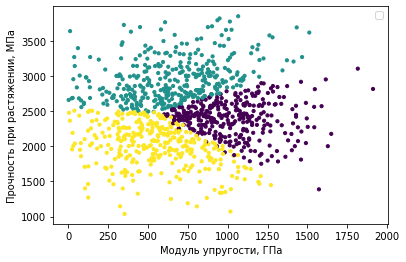

In [ ]:
plt.scatter(df['модуль упругости, ГПа'], df['Прочность при растяжении, МПа'], c=labels, s=10)
plt.xlabel('Модуль упругости, ГПа')
plt.ylabel('Прочность при растяжении, МПа')
plt.legend()
plt.show()

In [ ]:
# создание модели KMeans с 4 кластерами и заданным random_state для воспроизводимости результатов
# kmeans = KMeans(n_clusters=4, random_state=42)
kmeans = AgglomerativeClustering(n_clusters=4)
kmeans.fit(df)
labels = kmeans.labels_
df['cluster'] = labels
fig, axs = plt.subplots(13, 13, figsize=(60, 60))
for i in range(13):
    for j in range(13):
        axs[i, j].scatter(df.iloc[:,i], df.iloc[:,j], c=labels, s=25)
        axs[i, j].set_xlabel(df.columns[i])
        axs[i, j].set_ylabel(df.columns[j])
plt.show()

Output hidden; open in https://colab.research.google.com to view.

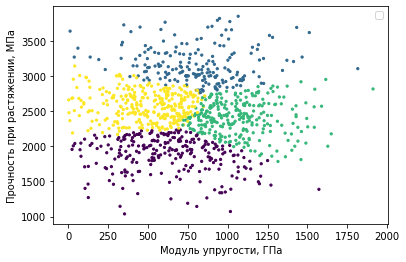

In [ ]:
plt.scatter(df['модуль упругости, ГПа'], df['Прочность при растяжении, МПа'], c=labels, s=5)
plt.xlabel('Модуль упругости, ГПа')
plt.ylabel('Прочность при растяжении, МПа')
plt.legend()
plt.show()

In [ ]:
# создание модели KMeans с 10, 20, 30 кластерами и заданным random_state для воспроизводимости результатов
# kmeans = KMeans(n_clusters=10, random_state=42)
# kmeans = KMeans(n_clusters=30, random_state=42)
kmeans = AgglomerativeClustering(n_clusters=10)
kmeans.fit(df)
labels = kmeans.labels_
df['cluster'] = labels
fig, axs = plt.subplots(13, 13, figsize=(60, 60))
for i in range(13):
    for j in range(13):
        axs[i, j].scatter(df.iloc[:,i], df.iloc[:,j], c=labels, s=25)
        axs[i, j].set_xlabel(df.columns[i])
        axs[i, j].set_ylabel(df.columns[j])
plt.show()

Output hidden; open in https://colab.research.google.com to view.

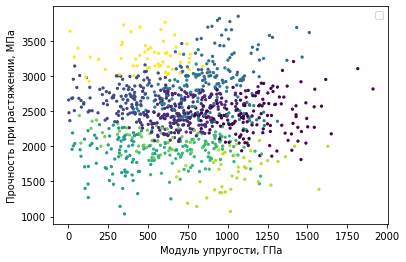

In [ ]:
plt.scatter(df['модуль упругости, ГПа'], df['Прочность при растяжении, МПа'], c=labels, s=5)
plt.xlabel('Модуль упругости, ГПа')
plt.ylabel('Прочность при растяжении, МПа')
plt.legend()
plt.show()

In [ ]:
df3_0 = df.loc[(df['cluster'] == 0)]
df3_1 = df.loc[(df['cluster'] == 1)]
df3_2 = df.loc[(df['cluster'] == 2)]

In [ ]:
df4_0 = df.loc[(df['cluster'] == 0)]
df4_1 = df.loc[(df['cluster'] == 1)]
df4_2 = df.loc[(df['cluster'] == 2)]

[]

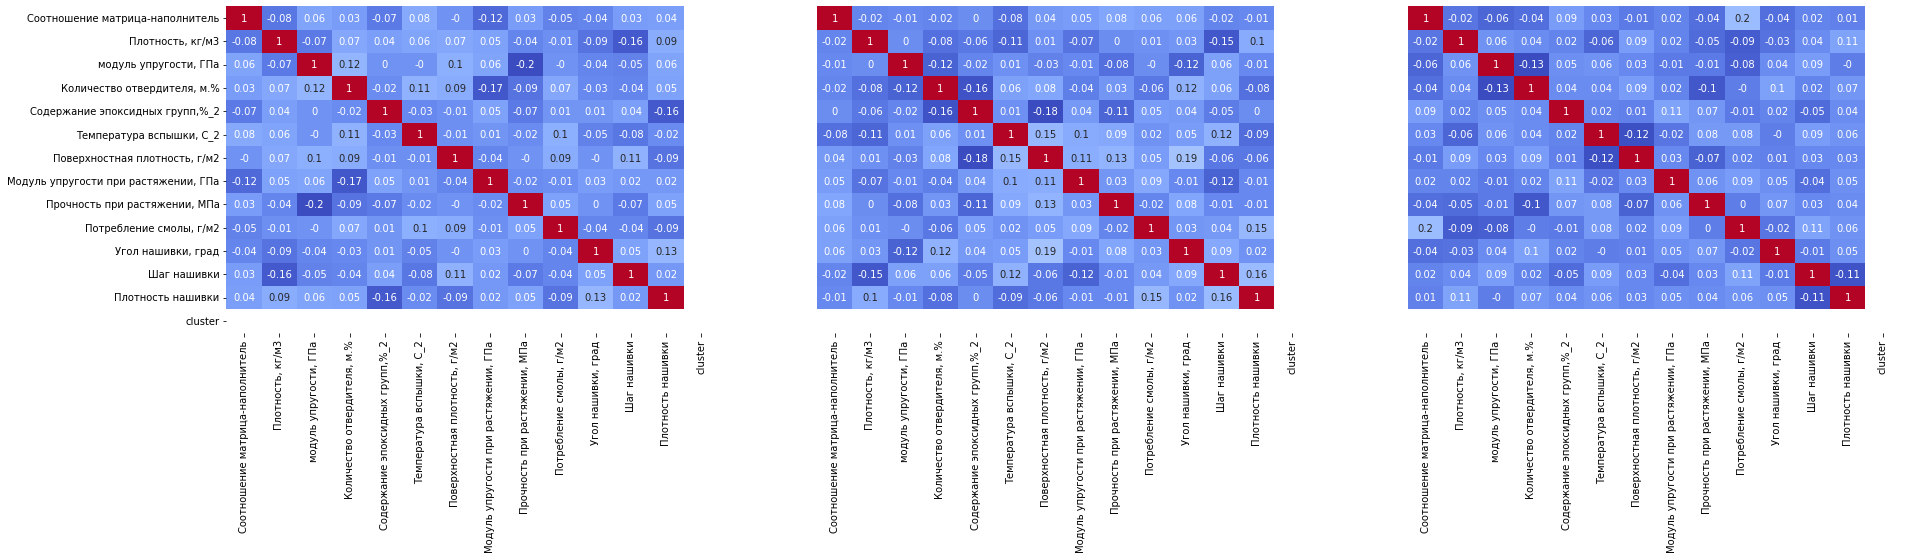

In [ ]:
#строим матрицы корреляции
fig = plt.figure(figsize=(30,6))
ax = fig.add_subplot(131)
sns.heatmap(df3_0.corr().round(2),annot=True, cmap='coolwarm', cbar=False)
ax = fig.add_subplot(132)
sns.heatmap(df3_1.corr().round(2),annot=True, cmap='coolwarm', cbar=False)
ax.set_yticks([])
ax = fig.add_subplot(133)
sns.heatmap(df3_2.corr().round(2),annot=True, cmap='coolwarm', cbar=False)
ax.set_yticks([])

In [ ]:
plt.figure(figsize=(15,6))
sns.pairplot(df3_0)

In [ ]:
df3_0.describe()

Соотношение матрица-наполнитель  Плотность, кг/м3  \
count                       333.000000        333.000000   
mean                          2.922154       1973.956881   
std                           0.979906         72.516107   
min                           0.389403       1731.764635   
25%                           2.219589       1920.694722   
50%                           2.913953       1978.114531   
75%                           3.550392       2017.204418   
max                           5.591742       2184.493200   

       модуль упругости, ГПа  Количество отвердителя, м.%  \
count             333.000000                   333.000000   
mean             1020.819206                   113.225547   
std               234.627391                    25.958016   
min               602.093245                    33.624187   
25%               841.064806                    96.885762   
50%               996.018683                   112.556323   
75%              1157.430119                   131.510859   
max              1911.536477                   192.705385   

       Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
count                       333.000000                333.000000   
mean                         22.169659                287.602244   
std                           2.343321                 41.556134   
min                          15.881668                160.255843   
25%                          20.552568                257.782207   
50%                          22.195377                288.952099   
75%                          23.712518                317.571591   
max                          28.955094                386.067992   

       Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
count                     333.000000                            333.000000   
mean                      504.068376                             73.366249   
std                       277.427171                              3.242281   
min                         7.095354                             64.696400   
25%                       293.085220                             71.306992   
50%                       488.873301                             73.090961   
75%                       701.842769                             75.482076   
max                      1230.465214                             82.237600   

       Прочность при растяжении, МПа  Потребление смолы, г/м2  \
count                     333.000000               333.000000   
mean                     2393.176328               218.268714   
std                       242.866925                57.256848   
min                      1386.578973                33.803026   
25%                      2254.240098               180.498228   
50%                      2420.066446               217.481262   
75%                      2559.643047               256.737402   
max                      3103.000733               359.052220   

       Угол нашивки, град  Шаг нашивки  Плотность нашивки  cluster  
count          333.000000   333.000000         333.000000    333.0  
mean            45.675676     6.814813          57.844863      0.0  
std             45.062640     2.631522          12.206426      0.0  
min              0.000000     0.037639          17.934408      0.0  
25%              0.000000     5.041809          50.031261      0.0  
50%             90.000000     7.000000          57.881818      0.0  
75%             90.000000     8.465672          65.325912      0.0  
max             90.000000    14.440522          98.202603      0.0

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

In [ ]:
# df_norm = MinMaxScaler().fit_transform(np.array(df3_2))
# df_norm = pd.DataFrame(data = df_norm, columns = df.columns)

# X = df3_1[['Соотношение матрица-наполнитель', 'Плотность, кг/м3', 'модуль упругости, ГПа', 'Количество отвердителя, м.%', 
#              'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
#              'Поверхностная плотность, г/м2', 'Прочность при растяжении, МПа', 'Потребление смолы, г/м2',
#              'Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки']]
# y = df3_1[['Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа']]

X = df3_0[['Соотношение матрица-наполнитель', 'Количество отвердителя, м.%', 
             'Содержание эпоксидных групп,%_2', 'Потребление смолы, г/м2', 'Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки']]
y = df3_0[['Модуль упругости при растяжении, ГПа']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
models = [
    {'model': LinearRegression(), 
     'params': {'fit_intercept': [True, False], 'copy_X': [True, False]}},
    {'model': Ridge(), 
     'params': {'alpha': [0.1, 1, 10, 100],}},
    {'model': Lasso(), 
     'params': {'alpha': [0.1, 1, 10, 100],}},
    {'model': ElasticNet(), 
     'params': {'alpha': [0.1, 1, 10, 100], 'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]}},
    {'model': SVR(),
     'params': {'kernel': ['linear', 'rbf', 'sigmoid'],'C': [0.1, 1, 10, 100],'epsilon': [0.1, 0.2, 0.3],'gamma': ['scale', 'auto']}},
    {'model': RandomForestRegressor(), 
     'params': {'n_estimators': [10, 20, 30], 'max_depth': [3, 5, 7], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}},
    {'model': AdaBoostRegressor(), 
     'params': {'n_estimators': [10, 20, 30], 'learning_rate': [0.1, 1, 10], 'loss' : ['linear', 'square', 'exponential']}},
    {'model': GradientBoostingRegressor(), 
     'params': {'learning_rate': [0.1, 1, 10],'n_estimators': [10, 20, 30],'subsample' : [0.5, 0.8, 1.0],'max_depth': [3, 5, 7],'min_samples_split':[2, 5, 10],'min_samples_leaf':[1, 2, 4],'random_state': [42]}},
    {'model': DecisionTreeRegressor(),
     'params': {'max_depth' : range(1,50),'min_samples_split' : range(2,50),'min_samples_leaf' : range(1,50)}},
    {'model': XGBRegressor(),
     'params': {'learning_rate': [0.1, 1, 10],'n_estimators': [10, 20, 30],'subsample' : [0.5, 0.8, 1.0],'max_depth': [3, 5, 7],'min_child_weight':[1, 2, 4],'gamma':[0, 0.1, 0.5, 1],'random_state': [42]}},
]
# GridSearch заменили на RandomizedSearchCV. Это позволило заметно уменьшить время обучения моделей.
for model in models:
    print(model['model'].__class__.__name__)
    classifier = RandomizedSearchCV(model['model'], model['params'], cv=5)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print("Best parameters:", classifier.best_params_)
    print(f'MSE:, {mean_squared_error(y_test, y_pred):.3f}')
    print(f'RMSE:, {mean_squared_error(y_test, y_pred, squared=False):.3f}')
    print(f'MAE:, {mean_absolute_error(y_test, y_pred):.3f}')
    print(f'R2:, {r2_score(y_test, y_pred):.3f}')
    print("===")  

LinearRegression
Best parameters: {'fit_intercept': True, 'copy_X': True}
MSE:, 7.805
RMSE:, 2.794
MAE:, 2.321
R2:, 0.030
===
Ridge
Best parameters: {'alpha': 100}
MSE:, 7.848
RMSE:, 2.801
MAE:, 2.338
R2:, 0.025
===
Lasso
Best parameters: {'alpha': 100}
MSE:, 8.102
RMSE:, 2.846
MAE:, 2.400
R2:, -0.007
===
ElasticNet
Best parameters: {'l1_ratio': 0.5, 'alpha': 100}
MSE:, 8.102
RMSE:, 2.846
MAE:, 2.400
R2:, -0.007
===
SVR
Best parameters: {'kernel': 'rbf', 'gamma': 'scale', 'epsilon': 0.3, 'C': 0.1}
MSE:, 8.146
RMSE:, 2.854
MAE:, 2.398
R2:, -0.012
===
RandomForestRegressor
Best parameters: {'n_estimators': 10, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 3}
MSE:, 7.858
RMSE:, 2.803
MAE:, 2.292
R2:, 0.023
===
AdaBoostRegressor
Best parameters: {'n_estimators': 30, 'loss': 'linear', 'learning_rate': 0.1}
MSE:, 7.955
RMSE:, 2.820
MAE:, 2.323
R2:, 0.011
===
GradientBoostingRegressor
Best parameters: {'subsample': 1.0, 'random_state': 42, 'n_estimators': 20, 'min_samples_split'

#Попробуем нейросеть

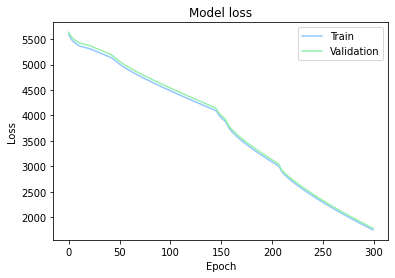

3/3 [==============================] - 0s 4ms/step


KeyError: ignored

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Normalization
from sklearn.model_selection import train_test_split
from keras.callbacks import History
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# создание модели
model = Sequential()
model.add(Normalization(axis=-1))
model.add(Dense(16, input_dim=X_train.shape[1], activation='sigmoid'))
model.add(Dense(8, activation='sigmoid'))
model.add(Dense(y_train.shape[1]))

# компиляция модели
model.compile(loss='mse', optimizer='adam')

# обучение модели
history = model.fit(X_train, y_train, epochs=300, batch_size=10, verbose=0, validation_split=0.2)

# визуализация обучения
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# оценка модели на тестовых данных
# scores = model.evaluate(X_test, y_test)
# print(f'Test loss: {scores}')

# прогнозирование значения целевых переменных 
y_pred = model.predict(X_test)

# вычисляем MSE для каждой из двух целевых переменных
mse_strength = mean_squared_error(y_test['Прочность при растяжении, МПа'], y_pred[:, 0])
mse_modulus = mean_squared_error(y_test['Модуль упругости при растяжении, ГПа'], y_pred[:, 1])
print(f'MSE for strength: {mse_strength}')
print(f'MSE for modulus: {mse_modulus}')

# вычисляем MAE для каждой из двух целевых переменных
mae_strength = mean_absolute_error(y_test['Прочность при растяжении, МПа'], y_pred[:, 0])
mae_modulus = mean_absolute_error(y_test['Модуль упругости при растяжении, ГПа'], y_pred[:, 1])
print(f'MAE for strength: {mae_strength}')
print(f'MAE for modulus: {mae_modulus}')

# вычисляем R2 для каждой из двух целевых переменных
r2_strength = r2_score(y_test['Прочность при растяжении, МПа'], y_pred[:, 0])
r2_modulus = r2_score(y_test['Модуль упругости при растяжении, ГПа'], y_pred[:, 1])
print(f'R2 for strength: {r2_strength}')
print(f'R2 for modulus: {r2_modulus}')

In [ ]:
y_pred

In [ ]:
y_test

Применим различные методы кластеризации.
Кластеризуем на 2, 3, 4 кластера исходные данные и нормализованные данные.

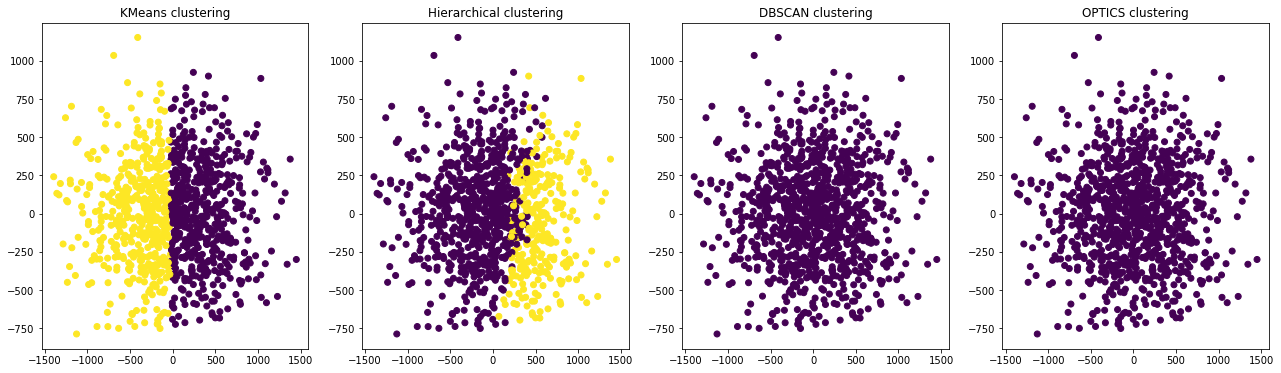

In [ ]:
X = df

# кластеризуем данные разными методами
kmeans = KMeans(n_clusters=2).fit(X)
hierarchical = AgglomerativeClustering(n_clusters=2).fit(X)
dbscan = DBSCAN(eps=0.5, min_samples=5).fit(X)
optics = OPTICS(min_samples=5, xi=.05, min_cluster_size=.05).fit(X)

# снизим размерность данных до 2D для визуализации
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)

# визуализируем кластеризованные данные
fig, axs = plt.subplots(1, 4, figsize=(22, 6))
axs[0].scatter(X_2d[:, 0], X_2d[:, 1], c=kmeans.labels_)
axs[0].set_title('KMeans clustering')
axs[1].scatter(X_2d[:, 0], X_2d[:, 1], c=hierarchical.labels_)
axs[1].set_title('Hierarchical clustering')
axs[2].scatter(X_2d[:, 0], X_2d[:, 1], c=dbscan.labels_)
axs[2].set_title('DBSCAN clustering')
axs[3].scatter(X_2d[:, 0], X_2d[:, 1], c=optics.labels_)
axs[3].set_title('OPTICS clustering')
plt.show()

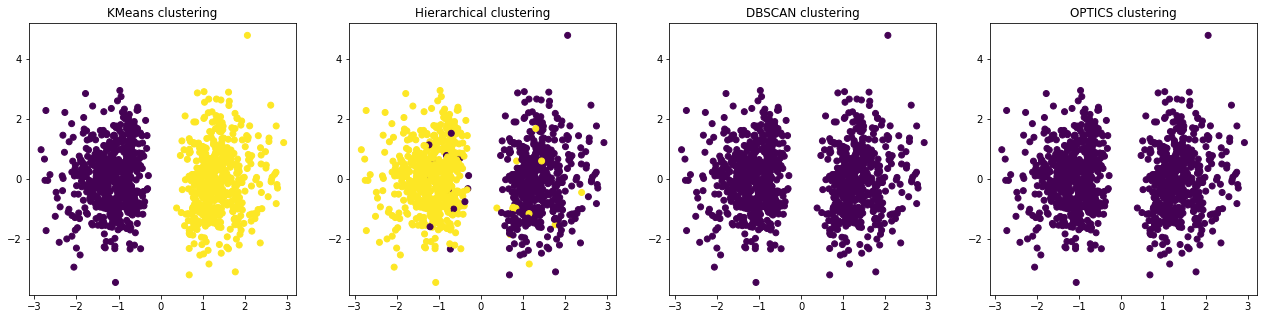

In [ ]:
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN, OPTICS
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

scaler = StandardScaler()
X = scaler.fit_transform(df)

# кластеризуем данные разными методами
kmeans = KMeans(n_clusters=2).fit(X)
hierarchical = AgglomerativeClustering(n_clusters=2).fit(X)
dbscan = DBSCAN(eps=0.5, min_samples=5).fit(X)
optics = OPTICS(min_samples=5, xi=.05, min_cluster_size=.05).fit(X)

# снизим размерность данных до 2D для визуализации
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)

# визуализируем кластеризованные данные
fig, axs = plt.subplots(1, 4, figsize=(22, 5))
axs[0].scatter(X_2d[:, 0], X_2d[:, 1], c=kmeans.labels_)
axs[0].set_title('KMeans clustering')
axs[1].scatter(X_2d[:, 0], X_2d[:, 1], c=hierarchical.labels_)
axs[1].set_title('Hierarchical clustering')
axs[2].scatter(X_2d[:, 0], X_2d[:, 1], c=dbscan.labels_)
axs[2].set_title('DBSCAN clustering')
axs[3].scatter(X_2d[:, 0], X_2d[:, 1], c=optics.labels_)
axs[3].set_title('OPTICS clustering')
plt.show()

При визуализации результатов кластеризации с применением метода главных компонент на нормированных данных отчетливо выделяютя два кластера.

In [ ]:
df_norm = pd.DataFrame(data = X, columns = df.columns)
# добавление меток кластеров в датасет
df_norm['cluster'] = kmeans.labels_
df_norm

Соотношение матрица-наполнитель  Плотность, кг/м3  \
0                           -1.174810          0.736063   
1                           -1.174810          0.736063   
2                           -1.174810          0.736063   
3                           -1.174810          0.736063   
4                           -0.173539          0.736063   
...                               ...               ...   
1017                        -0.721150         -0.320671   
1018                         0.563231          1.008536   
1019                         0.384246         -0.045543   
1020                         0.849453          1.235185   
1021                         0.961902         -1.157172   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
0                 -0.002282                    -2.847393   
1                 -0.002282                    -2.140577   
2                 -0.002282                    -2.144111   
3                 -0.002282                     0.651349   
4                  0.040948                     0.045607   
...                     ...                          ...   
1017               0.525446                    -0.833242   
1018              -0.893365                     1.251506   
1019              -0.977914                    -0.001273   
1020               0.006019                     1.089503   
1021              -0.976460                     0.657831   

      Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
0                            0.009762                 -4.540026   
1                            0.625704                 -0.030970   
2                            4.469779                 -0.030970   
3                           -0.413234                  0.344785   
4                            0.009762                 -0.030970   
...                               ...                       ...   
1017                        -0.881485                  0.949880   
1018                        -1.099030                 -0.773461   
1019                         0.711937                 -0.914934   
1020                        -1.245655                 -0.246770   
1021                         2.173625                  0.368054   

      Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
0                         -0.969325                             -1.066905   
1                         -0.969325                             -1.066905   
2                         -0.969325                             -1.066905   
3                         -0.969325                             -1.066905   
4                         -0.969325                             -1.066905   
...                             ...                                   ...   
1017                      -0.972179                             -0.074799   
1018                      -0.468450                             -0.129407   
1019                       0.918444                              0.452678   
1020                       0.567076                              0.230684   
1021                       0.984694                              0.316381   

      Прочность при растяжении, МПа  Потребление смолы, г/м2  \
0                          1.097263                 0.027759   
1                          1.097263                 0.027759   
2                          1.097263                 0.027759   
3                          1.097263                 0.027759   
4                          1.097263                 0.027759   
...                             ...                      ...   
1017                      -0.164989                -1.563900   
1018                      -0.220406                -1.685840   
1019                       0.402808                 0.306016   
1020                      -0.815116                -0.355509   
1021                       0.801283                -0.395249   

      Угол нашивки, град  Шаг нашивки  Плотность нашивки  cluster  
0        

In [ ]:
df2_0 = df_norm.loc[(df_norm['cluster'] == 0)]
df2_1 = df_norm.loc[(df_norm['cluster'] == 1)]
print(df2_0.shape)
print(df2_1.shape)

(549, 14)
(473, 14)


Строим модели регрессии отдельно для двух кластеров, для каждой из двух целевых переменных, только по факторам и по всем колонкам 

In [ ]:
# df_norm = MinMaxScaler().fit_transform(np.array(df3_2))
# df_norm = pd.DataFrame(data = df_norm, columns = df.columns)

X = df2_0[['Соотношение матрица-наполнитель', 'Плотность, кг/м3', 'модуль упругости, ГПа', 'Количество отвердителя, м.%', 
             'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
             'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа', 'Потребление смолы, г/м2',
             'Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки']]
y = df2_0['Прочность при растяжении, МПа']

# X = df2_0[['Соотношение матрица-наполнитель', 'Количество отвердителя, м.%', 
#              'Содержание эпоксидных групп,%_2', 'Потребление смолы, г/м2', 'Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки']]
# y = df2_0['Прочность при растяжении, МПа']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
models = [
    {'model': LinearRegression(), 
     'params': {'fit_intercept': [True, False], 'copy_X': [True, False]}},
    {'model': Ridge(), 
     'params': {'alpha': [0.1, 1, 10, 100],}},
    {'model': Lasso(), 
     'params': {'alpha': [0.1, 1, 10, 100],}},
    {'model': ElasticNet(), 
     'params': {'alpha': [0.1, 1, 10, 100], 'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]}},
    {'model': SVR(),
     'params': {'kernel': ['linear', 'rbf', 'sigmoid'],'C': [0.1, 1, 10, 100],'epsilon': [0.1, 0.2, 0.3],'gamma': ['scale', 'auto']}},
    {'model': RandomForestRegressor(), 
     'params': {'n_estimators': [10, 20, 30], 'max_depth': [3, 5, 7], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}},
    {'model': AdaBoostRegressor(), 
     'params': {'n_estimators': [10, 20, 30], 'learning_rate': [0.1, 1, 10], 'loss' : ['linear', 'square', 'exponential']}},
    {'model': GradientBoostingRegressor(), 
     'params': {'learning_rate': [0.1, 1, 10],'n_estimators': [10, 20, 30],'subsample' : [0.5, 0.8, 1.0],'max_depth': [3, 5, 7],'min_samples_split':[2, 5, 10],'min_samples_leaf':[1, 2, 4],'random_state': [42]}},
    {'model': DecisionTreeRegressor(),
     'params': {'max_depth' : range(1,50),'min_samples_split' : range(2,50),'min_samples_leaf' : range(1,50)}},
    {'model': XGBRegressor(),
     'params': {'learning_rate': [0.1, 1, 10],'n_estimators': [10, 20, 30],'subsample' : [0.5, 0.8, 1.0],'max_depth': [3, 5, 7],'min_child_weight':[1, 2, 4],'gamma':[0, 0.1, 0.5, 1],'random_state': [42]}},
]
# GridSearch заменили на RandomizedSearchCV. Это позволило заметно уменьшить время обучения моделей.
for model in models:
    print(model['model'].__class__.__name__)
    classifier = RandomizedSearchCV(model['model'], model['params'], cv=5)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print("Best parameters:", classifier.best_params_)
    print(f'MSE: {mean_squared_error(y_test, y_pred):.3f}')
    print(f'RMSE: {mean_squared_error(y_test, y_pred, squared=False):.3f}')
    print(f'MAE: {mean_absolute_error(y_test, y_pred):.3f}')
    print(f'R2: {r2_score(y_test, y_pred):.3f}')
    print("===")  

LinearRegression
Best parameters: {'fit_intercept': True, 'copy_X': True}
MSE: 0.399
RMSE: 0.632
MAE: 0.489
R2: -0.051
===
Ridge
Best parameters: {'alpha': 100}
MSE: 0.394
RMSE: 0.627
MAE: 0.487
R2: -0.036
===
Lasso
Best parameters: {'alpha': 0.1}
MSE: 0.380
RMSE: 0.616
MAE: 0.482
R2: -0.000
===
ElasticNet
Best parameters: {'l1_ratio': 0.3, 'alpha': 0.1}
MSE: 0.387
RMSE: 0.622
MAE: 0.483
R2: -0.018
===
SVR
Best parameters: {'kernel': 'linear', 'gamma': 'auto', 'epsilon': 0.3, 'C': 10}
MSE: 0.410
RMSE: 0.640
MAE: 0.485
R2: -0.078
===
RandomForestRegressor
Best parameters: {'n_estimators': 10, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 3}
MSE: 0.408
RMSE: 0.639
MAE: 0.495
R2: -0.074
===
AdaBoostRegressor
Best parameters: {'n_estimators': 30, 'loss': 'square', 'learning_rate': 0.1}
MSE: 0.376
RMSE: 0.613
MAE: 0.486
R2: 0.010
===
GradientBoostingRegressor
Best parameters: {'subsample': 1.0, 'random_state': 42, 'n_estimators': 10, 'min_samples_split': 5, 'min_samples_leaf'

результаты плохие

пробуем НС

In [ ]:
# добавление меток кластеров в датасет
df['cluster'] = kmeans.labels_
df2_0 = df.loc[(df_norm['cluster'] == 0)]
df2_1 = df.loc[(df_norm['cluster'] == 1)]
print(df2_0.shape)
print(df2_1.shape)

(549, 14)
(473, 14)


In [ ]:
X = df2_1[['Соотношение матрица-наполнитель', 'Плотность, кг/м3', 'модуль упругости, ГПа', 'Количество отвердителя, м.%', 
             'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
             'Поверхностная плотность, г/м2', 'Потребление смолы, г/м2',
             'Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки']]
y = df2_1[['Прочность при растяжении, МПа', 'Модуль упругости при растяжении, ГПа']]

# X = df2_0[['Соотношение матрица-наполнитель', 'Количество отвердителя, м.%', 
#              'Содержание эпоксидных групп,%_2', 'Потребление смолы, г/м2', 'Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки']]
# y = df2_0['Прочность при растяжении, МПа']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

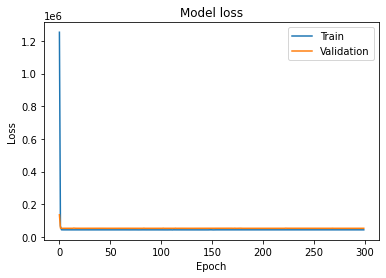

3/3 [==============================] - 0s 4ms/step
MSE for strength: 81799.15453568607
MSE for modulus: 9.929449835511612
MAE for strength: 232.21510508682258
MAE for modulus: 2.6276258447378997
R2 for strength: -0.0023818556005341662
R2 for modulus: -0.0040812573731541235


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Normalization
from sklearn.model_selection import train_test_split
from keras.callbacks import History
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# создание модели
model = Sequential()
model.add(Normalization(axis=-1))
model.add(Dense(8, input_dim=X_train.shape[1], activation='sigmoid'))
model.add(Dense(8, activation='sigmoid'))
model.add(Dense(y_train.shape[1]))

# компиляция модели
model.compile(loss='mse', optimizer='SGD')

# обучение модели
history = model.fit(X_train, y_train, epochs=300, batch_size=10, verbose=0, validation_split=0.2)

# визуализация обучения
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# оценка модели на тестовых данных
# scores = model.evaluate(X_test, y_test)
# print(f'Test loss: {scores}')

# прогнозирование значения целевых переменных 
y_pred = model.predict(X_test)

# вычисляем MSE для каждой из двух целевых переменных
mse_strength = mean_squared_error(y_test['Прочность при растяжении, МПа'], y_pred[:, 0])
mse_modulus = mean_squared_error(y_test['Модуль упругости при растяжении, ГПа'], y_pred[:, 1])
print(f'MSE for strength: {mse_strength}')
print(f'MSE for modulus: {mse_modulus}')

# вычисляем MAE для каждой из двух целевых переменных
mae_strength = mean_absolute_error(y_test['Прочность при растяжении, МПа'], y_pred[:, 0])
mae_modulus = mean_absolute_error(y_test['Модуль упругости при растяжении, ГПа'], y_pred[:, 1])
print(f'MAE for strength: {mae_strength}')
print(f'MAE for modulus: {mae_modulus}')

# вычисляем R2 для каждой из двух целевых переменных
r2_strength = r2_score(y_test['Прочность при растяжении, МПа'], y_pred[:, 0])
r2_modulus = r2_score(y_test['Модуль упругости при растяжении, ГПа'], y_pred[:, 1])
print(f'R2 for strength: {r2_strength}')
print(f'R2 for modulus: {r2_modulus}')

In [ ]:
y_pred

array([[2883.244   ,   73.173805],
       [2883.244   ,   73.173805],
       [2883.244   ,   73.173805],
       [2883.244   ,   73.173805],
       [2883.244   ,   73.173805],
       [2883.244   ,   73.173805],
       [2883.244   ,   73.173805],
       [2883.244   ,   73.173805],
       [2883.244   ,   73.173805],
       [2883.244   ,   73.173805],
       [2883.244   ,   73.173805],
       [2883.244   ,   73.173805],
       [2883.244   ,   73.173805],
       [2883.244   ,   73.173805],
       [2883.244   ,   73.173805],
       [2883.244   ,   73.173805],
       [2883.244   ,   73.173805],
       [2883.244   ,   73.173805],
       [2883.244   ,   73.173805],
       [2883.244   ,   73.173805],
       [2883.244   ,   73.173805],
       [2883.244   ,   73.173805],
       [2883.244   ,   73.173805],
       [2883.244   ,   73.173805],
       [2883.244   ,   73.173805],
       [2883.244   ,   73.173805],
       [2883.244   ,   73.173805],
       [2883.244   ,   73.173805],
       [2883.244   ,